### Reading images and labels in np array

In [1]:
import numpy as np
import cv2

# Paths
annotation_file_path = r'D:\MINOR\Project\original_dataset\train\train_annotations.txt'
image_size = (224, 224)  # Desired image size

# Initialize lists for images and labels
x_train = []
y_train = []

# Read the annotation file
with open(annotation_file_path, 'r') as f:
    for line in f:
        img_path, label = line.strip().split()
        label = int(label)  # Convert label to integer

        # Load the image
        img = cv2.imread(img_path)

        if img is not None:
            # Resize the image to the desired size
            img_resized = cv2.resize(img, image_size)
            x_train.append(img_resized)
            y_train.append(label)

# Convert lists to numpy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")

x_train shape: (6968, 224, 224, 3)
y_train shape: (6968,)


In [2]:
# Paths
annotation_file_path = r'D:\MINOR\Project\original_dataset\test\test_annotations.txt'
image_size = (224, 224)  # Desired image size

# Initialize lists for images and labels
x_test = []
y_test = []

# Read the annotation file
with open(annotation_file_path, 'r') as f:
    for line in f:
        img_path, label = line.strip().split()
        label = int(label)  # Convert label to integer

        # Load the image
        img = cv2.imread(img_path)

        if img is not None:
            # Resize the image to the desired size
            img_resized = cv2.resize(img, image_size)
            x_test.append(img_resized)
            y_test.append(label)

# Convert lists to numpy arrays
x_test = np.array(x_test)
y_test = np.array(y_test)

print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

x_test shape: (874, 224, 224, 3)
y_test shape: (874,)


In [3]:
# Paths
annotation_file_path = r'D:\MINOR\Project\original_dataset\valid\valid_annotations.txt'
image_size = (224, 224)  # Desired image size

# Initialize lists for images and labels
x_valid = []
y_valid = []

# Read the annotation file
with open(annotation_file_path, 'r') as f:
    for line in f:
        img_path, label = line.strip().split()
        label = int(label)  # Convert label to integer

        # Load the image
        img = cv2.imread(img_path)

        if img is not None:
            # Resize the image to the desired size
            img_resized = cv2.resize(img, image_size)
            x_valid.append(img_resized)
            y_valid.append(label)

# Convert lists to numpy arrays
x_valid = np.array(x_valid)
y_valid = np.array(y_valid)

print(f"x_valid shape: {x_valid.shape}")
print(f"y_valid shape: {y_valid.shape}")

x_valid shape: (870, 224, 224, 3)
y_valid shape: (870,)


### Training CNN

In [18]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models

In [19]:
# Assuming x_train, y_train, x_valid, y_valid are already defined and one-hot encoded

In [20]:
# Normalize the input data
x_train = x_train.astype('float32') / 255.0
x_valid = x_valid.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [21]:
# Build the CNN model
model = models.Sequential()

# Convolutional layer 1
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Convolutional layer 2
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Convolutional layer 3
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Flatten the output and add dense layers
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))  # Use 'sigmoid' for binary classification

In [22]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Use binary_crossentropy for binary classification
              metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(x_train, y_train,
                    epochs=15,  # Adjust the number of epochs as needed
                    batch_size=32,  # Adjust the batch size as needed
                    validation_data=(x_valid, y_valid))

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy:.4f}')

### Training MobileNet

In [13]:
##### import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import MobileNet
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Assuming x_train, y_train, x_valid, y_valid are already defined and one-hot encoded

# Normalize the input data
x_train = x_train.astype('float32') / 255.0
x_valid = x_valid.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Load MobileNet pre-trained on ImageNet and exclude the top layers
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers (so they don't get updated during training)
base_model.trainable = False

# Create a new model on top of MobileNet
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),  # Global average pooling layer
    layers.Dense(128, activation='relu'),  # Dense layer with 128 units
    layers.Dropout(0.3),  # Dropout to prevent overfitting
    layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Use binary_crossentropy for binary classification
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train,
                    epochs=5,  # Adjust the number of epochs as needed
                    batch_size=32,  # Adjust batch size as needed
                    validation_data=(x_valid, y_valid))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy:.4f}')

Epoch 1/5
218/218 [==============================] - 154s 696ms/step - loss: 0.7025 - accuracy: 0.5072 - val_loss: 0.6928 - val_accuracy: 0.5000
Epoch 2/5
218/218 [==============================] - 147s 675ms/step - loss: 0.6938 - accuracy: 0.5036 - val_loss: 0.6923 - val_accuracy: 0.5000
Epoch 3/5
218/218 [==============================] - 148s 679ms/step - loss: 0.6936 - accuracy: 0.4937 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 4/5
218/218 [==============================] - 147s 675ms/step - loss: 0.6929 - accuracy: 0.5182 - val_loss: 0.6929 - val_accuracy: 0.5000
Epoch 5/5
28/28 [==============================] - 22s 639ms/step - loss: 0.6928 - accuracy: 0.5000
Test accuracy: 0.5000


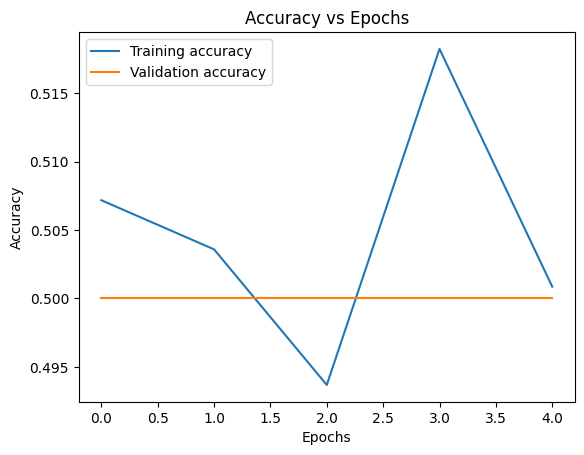

In [14]:
import matplotlib.pyplot as plt
# Plot accuracy
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

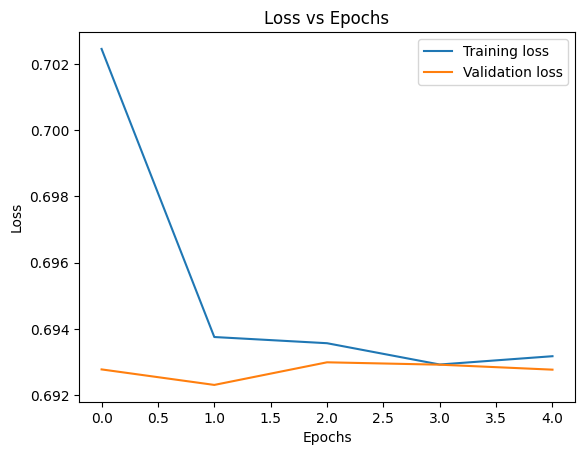

In [15]:
# Plot loss
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [16]:
model.save('fatigue_model.h5')

### Training ResNet 

In [ ]:
# import numpy as np
# import tensorflow as tf
# from keras.models import Model
# from keras.layers import Dense, GlobalAveragePooling2D
# from keras.applications import ResNet50
# from keras.preprocessing.image import ImageDataGenerator
# from sklearn.model_selection import train_test_split
# import os

# # Load your dataset paths
# dataset_path = 'your_dataset_path'  # Change this to your dataset path
# categories = ['Active', 'Sleepy']

# # Load dataset
# def load_data():
#     images = []
#     labels = []
#     for category in categories:
#         path = os.path.join(dataset_path, category)
#         class_num = categories.index(category)
#         for img in os.listdir(path):
#             img_array = tf.keras.preprocessing.image.load_img(os.path.join(path, img), target_size=(224, 224))
#             img_array = tf.keras.preprocessing.image.img_to_array(img_array)
#             images.append(img_array)
#             labels.append(class_num)
#     return np.array(images), np.array(labels)

# # Load images and labels
# X, y = load_data()

# # Split into training and validation sets
# X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# # Normalize the images
# X_train = X_train.astype('float32') / 255.0
# X_valid = X_valid.astype('float32') / 255.0

# # Data Augmentation
# datagen = ImageDataGenerator(rotation_range=20,
#                              width_shift_range=0.2,
#                              height_shift_range=0.2,
#                              shear_range=0.2,
#                              zoom_range=0.2,
#                              horizontal_flip=True)

# # Build the ResNet model
# def create_model():
#     base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
#     x = base_model.output
#     x = GlobalAveragePooling2D()(x)
#     x = Dense(1, activation='sigmoid')(x)  # Binary classification
#     model = Model(inputs=base_model.input, outputs=x)
#     return model

# # Create and compile the model
# model = create_model()
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# # Train the model
# model.fit(datagen.flow(X_train, y_train, batch_size=32), 
#           validation_data=(X_valid, y_valid), 
#           epochs=10)

# # Save the trained model
# model.save('fatigue_model.h5')

### Real-time

In [4]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [5]:
new_model=tf.keras.models.load_model('fatigue_model.h5')

In [ ]:
import cv2
import numpy as np
from keras.models import load_model

# Load the pre-trained model
new_model = load_model('fatigue_model.h5')

# Load Haar cascade classifiers for face and eye detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

# Initialize video capture
cap = cv2.VideoCapture(1)
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")

while True:
    ret, frame = cap.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)

    # Initialize status
    status = "Unknown"

    for (x, y, w, h) in faces:
        roi_gray = gray[y:y + h, x:x + w]
        roi_color = frame[y:y + h, x:x + w]

        # Detect eyes within the face region
        eyes = eye_cascade.detectMultiScale(roi_gray, 1.1, 4)

        if len(eyes) > 0:  # If eyes are detected
            for (ex, ey, ew, eh) in eyes:
                roi_eye_color = roi_color[ey:ey + eh, ex:ex + ew]

                # Resize the detected eye region and prepare for prediction
                try:
                    final_image = cv2.resize(roi_eye_color, (224, 224))
                    final_image = np.expand_dims(final_image, axis=0)

                    # Make predictions
                    Predictions = new_model.predict(final_image)
                    predicted_class = np.argmax(Predictions, axis=1)[0]

                    # Determine status based on predicted class
                    if predicted_class == 0:  # Assuming class 0 corresponds to "Active"
                        status = "Active"
                    elif predicted_class == 1:  # Assuming class 1 corresponds to "Sleepy"
                        status = "Sleepy"

                except Exception as e:
                    print(f"Error in processing: {e}")
                    status = "Error"

        else:
            # If no eyes detected, mark as "Sleepy"
            status = "Sleepy"

        # Draw rectangle around the face
        cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)

    # Display status text on video
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(frame, status, (50, 50), font, 1, (0, 0, 255), 2, cv2.LINE_AA)

    # Show the frame
    cv2.imshow('Sleepiness Detection Window', frame)

    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 66ms/step
